---

title: "Neural Network Model for House Prices (PyTorch)"
author: "Surawut Kittikaiwan"
date: "2025-02-13"

---

In [1]:
# Import Libraries for data exploration and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set random seed for reproducibility
RANDOM_SEED = 42

# 1. Explore Data

In [2]:
train_data = pd.read_csv('http://raw.githubusercontent.com/SurawutK/Kaggle-Projects/refs/heads/main/datasets/house-prices/train.csv')
test_data = pd.read_csv('https://raw.githubusercontent.com/SurawutK/Kaggle-Projects/refs/heads/main/datasets/house-prices/test.csv')

print(f'Shape of train dataset: {train_data.shape}')
print(f'Shape of test dataset: {test_data.shape}')

Shape of train dataset: (1460, 81)
Shape of test dataset: (1459, 80)


In [3]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
train_data.describe(include=['int', 'float'])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
train_data.describe(include=['object'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


C:\Users\ryusu\AppData\Local\Temp\ipykernel_33284\535077941.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


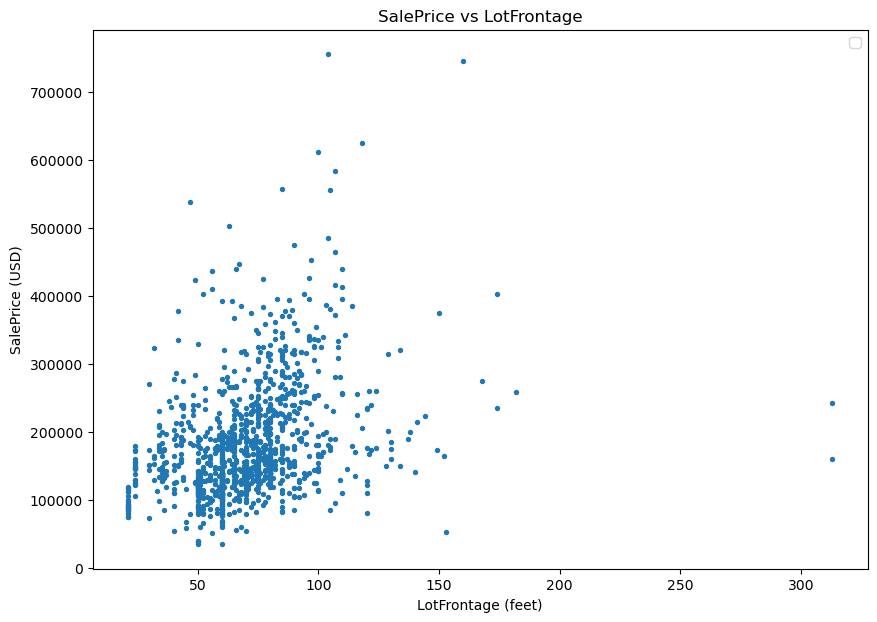

In [7]:
plt.figure(figsize=(10, 7))
plt.scatter(
    x=train_data['LotFrontage'],
    y=train_data['SalePrice'],
    s=8
)

plt.xlabel('LotFrontage (feet)')
plt.ylabel('SalePrice (USD)')
plt.title('SalePrice vs LotFrontage')
plt.legend()
plt.show()

# 2. Split Dataset into Train and Validation(Dev) Set

In [8]:
from sklearn.model_selection import train_test_split

X = train_data.drop(columns=['Id', 'SalePrice'])
y = train_data['SalePrice'].copy()

X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

print(f'Shape of Train set: [{X_train.shape}, {y_train.shape}]')
print(f'Shape of Dev set: [{X_dev.shape}, {y_dev.shape}]')

Shape of Train set: [(1168, 79), (1168,)]
Shape of Dev set: [(292, 79), (292,)]


# 3. Specify Numerical and Categorical Features in the Dataset

In [9]:
X.dtypes.value_counts()

object     43
int64      33
float64     3
Name: count, dtype: int64

In [10]:
numeric_cols = X.select_dtypes(include=['int', 'float']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

print(f'Numeric {len(numeric_cols)} columns:\n{numeric_cols}')
print(f'\nCategorical {len(categorical_cols)} columns:\n{categorical_cols}')

Numeric 36 columns:
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

Categorical 43 columns:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageTy

# 4. Check Features with Missing Values 

In [11]:
def check_missing(df):
    
    # Check missing values in each type of input features
    missing_counts = df.isna().sum(axis=0).sort_values(ascending=False)

    # Count the missing greater than zero
    missing_cols = missing_counts[missing_counts > 0].to_frame('missing_value_counts')

    # Percentage of missing values
    missing_cols['percent_missing'] = np.round(missing_cols['missing_value_counts'] / df.shape[0], 3)
    
    print(f'Number of features with missing values: {len(missing_cols)}')
    display(missing_cols)

In [12]:
check_missing(X_train)

Number of features with missing values: 19


,missing_value_counts,percent_missing
PoolQC,1162,0.995
MiscFeature,1122,0.961
Alley,1094,0.937
Fence,935,0.801
MasVnrType,683,0.585
FireplaceQu,547,0.468
LotFrontage,217,0.186
GarageQual,64,0.055
GarageFinish,64,0.055
GarageType,64,0.055


# 5. Data Preprocessing Pipeline

## Structure of the pipeline
Construct preprocessing pipe using `sklearn.compose.ColumnTransformer` and `sklearn.pipeline.Pipeline`

### For Numerical Features:

1. Drop any columns with missing values > 30%.
2. Impute columns with missing values with median using `SimpleImputer` class from `sklearn.impute` module.
3. Normalizing input features using Z-score normalization. Implement using `StandardScaler` class from `sklearn.preprocessing` module.

### For Categorical Features:
1. Drop any columns with missing values > 30%.
2. Impute columns with missing values with the most frequent value using `SimpleImputer` class from `sklearn.impute` module.
3. Encoding categorical features in One-hot format using `OneHotEncoder` class from `sklearn.preprocessing` module.

In [13]:
# modules for making pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# modules for preprocessing data
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Drop any columns with missing values > 30% in training set (X_train)
min_non_na = int(0.7 * len(X_train))
new_numeric_cols = X_train[numeric_cols].dropna(axis=1, thresh=min_non_na).columns.tolist()
new_categorical_cols = X_train[categorical_cols].dropna(axis=1, thresh=min_non_na).columns.tolist()

# Build pipelines and column transformer
numeric_pipeline = Pipeline(
    [
        ('numeric_imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]
)

categorical_pipeline = Pipeline(
    [
        ('categorical_imputer', SimpleImputer(strategy='most_frequent')),
        ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ]
)

preprocessing_pipeline = ColumnTransformer(
    [
        ('numeric_preprocess', numeric_pipeline, new_numeric_cols),
        ('categorical_preprocess', categorical_pipeline, new_categorical_cols)
    ],
    remainder='drop',
    verbose_feature_names_out=False
)

from sklearn import set_config
set_config(display='diagram')

In [14]:
# Test preprocessing pipeline
X_train_cleaned = preprocessing_pipeline.fit_transform(X_train)
X_train_cleaned = pd.DataFrame(
                        X_train_cleaned, 
                        index=X_train.index,
                        columns=preprocessing_pipeline.get_feature_names_out()
                    )

X_train_cleaned

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
254,-0.866764,-0.012468,-0.212896,-0.820445,0.372217,-0.455469,-1.346063,-0.597889,1.037269,-0.285504,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1066,0.074110,-0.502357,-0.265245,-0.088934,1.268609,0.718609,0.439214,-0.597889,-0.971996,-0.285504,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
638,-0.631546,-0.146074,-0.177841,-0.820445,1.268609,-1.988293,-1.683818,-0.597889,-0.971996,-0.285504,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
799,-0.161109,-0.457822,-0.324474,-0.820445,1.268609,-1.107734,-1.683818,0.861522,0.267995,-0.285504,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
380,-0.161109,-0.903175,-0.529035,-0.820445,0.372217,-1.531707,-1.683818,-0.597889,-0.496920,-0.285504,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,-0.866764,0.343814,-0.127631,-0.088934,-0.524174,1.142582,1.018222,-0.597889,-0.919694,-0.285504,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1130,-0.161109,-0.235145,-0.268313,-1.551955,-2.316957,-1.401254,-1.683818,-0.597889,0.383495,-0.285504,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1294,-0.866764,-0.457822,-0.234096,-0.820445,1.268609,-0.520696,0.246211,-0.597889,-0.608062,-0.285504,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
860,-0.161109,-0.680498,-0.283376,0.642577,2.165000,-1.727387,0.632217,-0.597889,-0.971996,-0.285504,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
# check missing values
check_missing(X_train_cleaned)

Number of features with missing values: 0


,missing_value_counts,percent_missing


In [16]:
preprocessing_pipeline

ColumnTransformer(transformers=[('numeric_preprocess',
                                 Pipeline(steps=[('numeric_imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['MSSubClass', 'LotFrontage', 'LotArea',
                                  'OverallQual', 'OverallCond', 'YearBuilt',
                                  'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
                                  'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                                  '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                                  'G...
                                  'LandContour', 'Utilities', 'LotConfig',
                                  'LandSlope', 'Neighborhood', 'Condition1',
                                  'Condition2', 'BldgType', 'HouseStyle',
                                  'RoofStyle', 'RoofMatl', 'Exterior1st',
                                  'Exterior2nd', 'ExterQual', 'ExterCond',
                                  'Foundation', 'BsmtQual', 'BsmtCond',
                                  'BsmtExposure', 'BsmtFinType1',
                                  'BsmtFinType2', 'Heating', 'HeatingQC',
                                  'CentralAir', 'Electrical', 'KitchenQual',
                                  'Functional', ...])],
                  verbose_feature_names_out=False)

# 6. Build and Evaluate Models

* Ridge Regression
* Neural Networks: Multilayer Perceptron (MLP)

## 6.1 Ridge Regression (baseline model)

In [17]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
 
model_0 = make_pipeline(
    preprocessing_pipeline,
    Ridge(random_state=RANDOM_SEED)
)

model_0.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric_preprocess',
                                                  Pipeline(steps=[('numeric_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1...
                                                   'Condition1', 'Condition2',
                                                   'BldgType', 'HouseStyle',
                                                   'RoofStyle', 'RoofMatl',
                                                   'Exterior1st', 'Exterior2nd',
                                                   'ExterQual', 'ExterCond',
                                                   'Foundation', 'BsmtQual',
                                                   'BsmtCond', 'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', 'KitchenQual',
                                                   'Functional', ...])],
                                   verbose_feature_names_out=False)),
                ('ridge', Ridge(random_state=42))])

In [18]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning,
                        module='sklearn.preprocessing._encoders')

In [19]:
from sklearn.metrics import mean_squared_log_error as MSLE

def evaluate_rmsle(model, X_train, y_train, X_dev, y_dev):
    y_train_pred = model.predict(X_train)
    train_msle = MSLE(y_true=y_train, y_pred=y_train_pred)
    train_rmsle = np.sqrt(train_msle)
    print(f'Train RMSLE: {train_rmsle:.6f}')
    
    y_dev_pred = model.predict(X_dev)
    dev_msle = MSLE(y_true=y_dev, y_pred=y_dev_pred)
    dev_rmsle = np.sqrt(dev_msle)
    print(f'Development RMSLE: {dev_rmsle:.6f}')

evaluate_rmsle(model_0, X_train, y_train, X_dev, y_dev)

Train RMSLE: 0.113819
Development RMSLE: 0.156466


In [20]:
from sklearn.model_selection import KFold, cross_val_score

def kfold_cross_validate(model, X, y, n_splits=5, scoring='neg_mean_squared_log_error'):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=RANDOM_SEED)
    cv_msle = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    print(f'Cross-Validation RMSLE: {np.sqrt(np.abs(cv_msle))}')
    print(f'Mean RMSLE: {np.sqrt(np.abs(cv_msle.mean())):.6f}')

kfold_cross_validate(model_0, X, y)

Cross-Validation RMSLE: [0.15646588 0.15234622 0.19496071 0.18724235 0.13179588]
Mean RMSLE: 0.166211


## 6.2 Fully Connected Neural Networks

### 1. Get data ready

In [21]:
# Clean data using pipeline and turn it into numpy array
preprocessing_pipeline.fit(X_train)
X_train_numpy = preprocessing_pipeline.transform(X_train)
y_train_numpy = y_train.to_numpy()
X_dev_numpy = preprocessing_pipeline.transform(X_dev)
y_dev_numpy = y_dev.to_numpy()

X_train_numpy[:10], y_train_numpy[:10]

(array([[-0.8667643 , -0.01246836, -0.21289571, ...,  0.        ,
          1.        ,  0.        ],
        [ 0.07410996, -0.50235683, -0.26524463, ...,  0.        ,
          1.        ,  0.        ],
        [-0.63154574, -0.14607431, -0.17784146, ...,  0.        ,
          1.        ,  0.        ],
        ...,
        [-0.16110861, -1.34852783, -0.48849463, ...,  0.        ,
          1.        ,  0.        ],
        [-0.8667643 ,  0.34381416,  0.1302082 , ...,  0.        ,
          1.        ,  0.        ],
        [-0.8667643 ,  0.25474353, -0.14241529, ...,  0.        ,
          0.        ,  1.        ]], shape=(10, 264)),
 array([145000, 178000,  85000, 175000, 127000, 149900, 174000, 125500,
        175500, 225000]))

In [22]:
# Libraries
import torch
from torch import nn

# Set device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [23]:
# Turn data into a tensor representation and put it in target device
X_train_tensor = torch.from_numpy(X_train_numpy).type(torch.float32).to(device)
y_train_tensor = torch.from_numpy(y_train_numpy).type(torch.float32).to(device)
X_dev_tensor = torch.from_numpy(X_dev_numpy).type(torch.float32).to(device)
y_dev_tensor = torch.from_numpy(y_dev_numpy).type(torch.float32).to(device)

print(f'X_train: {X_train_tensor.shape}\n{X_train_tensor[:10]}\n')
print(f'y_train: {y_train_tensor.shape}\n{y_train_tensor[:10]}\n')
print(f'X_dev: {X_dev_tensor.shape}\n{X_dev_tensor[:10]}\n')
print(f'y_dev: {y_dev_tensor.shape}\n{y_dev_tensor[:10]}')

X_train: torch.Size([1168, 264])
tensor([[-0.8668, -0.0125, -0.2129,  ...,  0.0000,  1.0000,  0.0000],
        [ 0.0741, -0.5024, -0.2652,  ...,  0.0000,  1.0000,  0.0000],
        [-0.6315, -0.1461, -0.1778,  ...,  0.0000,  1.0000,  0.0000],
        ...,
        [-0.1611, -1.3485, -0.4885,  ...,  0.0000,  1.0000,  0.0000],
        [-0.8668,  0.3438,  0.1302,  ...,  0.0000,  1.0000,  0.0000],
        [-0.8668,  0.2547, -0.1424,  ...,  0.0000,  0.0000,  1.0000]],
       device='cuda:0')

y_train: torch.Size([1168])
tensor([145000., 178000.,  85000., 175000., 127000., 149900., 174000., 125500.,
        175500., 225000.], device='cuda:0')

X_dev: torch.Size([292, 264])
tensor([[-0.8668, -0.0125, -0.2116,  ...,  0.0000,  1.0000,  0.0000],
        [ 0.0741,  1.2345,  0.1456,  ...,  0.0000,  1.0000,  0.0000],
        [-0.6315, -0.6360, -0.1608,  ...,  0.0000,  1.0000,  0.0000],
        ...,
        [ 2.4263, -2.0611, -0.7819,  ...,  0.0000,  1.0000,  0.0000],
        [ 2.8967, -2.1947, -0.81

### 2. Set Evaluation Metric for Regression Problem (RMSLE)

In [24]:
# use root mean squared error for evaluation metric
from torchmetrics import MeanSquaredLogError

msle_fn = MeanSquaredLogError().to(device)
msle_fn

MeanSquaredLogError()

### 3. Build model

In [25]:
import torch
from torch import nn

# Build neural network model with 3 hidden layers (L = 4), and 8 neurons per hidden layer (default)
class RegressionModel(nn.Module):
    def __init__(self, n_x:int, n_h=8):
        """
        Args:
            n_x (int): Number of input features
            n_h (int): Number of neurons in each hidden layer. default 8
        """
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Linear(in_features=n_x, out_features=n_h),
            nn.ReLU(),
            nn.Linear(in_features=n_h, out_features=n_h),
            nn.ReLU(),
            nn.Linear(in_features=n_h, out_features=n_h),
            nn.ReLU(),
            nn.Linear(in_features=n_h, out_features=1)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        z_L = self.layer_stack(x)
        return z_L

# Initialize model and move it to target device
torch.manual_seed(RANDOM_SEED)
n_x = X_train_tensor.shape[1]
n_h = 16
model_2 = RegressionModel(n_x=n_x, n_h=n_h)
model_2.to(device)

RegressionModel(
  (layer_stack): Sequential(
    (0): Linear(in_features=264, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=16, bias=True)
    (5): ReLU()
    (6): Linear(in_features=16, out_features=1, bias=True)
  )
)

In [26]:
# Make prediction on the untrained model and measure RMSE to see how bad's our model is (for now)
model_2.eval()
with torch.inference_mode():
    y_train_pred = model_2(X_train_tensor).squeeze()

train_rmsle = torch.sqrt(msle_fn(preds=y_train_pred, target=y_train_tensor))

print(f'y_train_preds:\n {y_train_pred[:10]}\n')
print(f'y_train:\n {y_train_tensor[:10]}\n')
print(f'Train RMSLE:\n {train_rmsle}')

y_train_preds:
 tensor([-0.3271, -0.2831, -0.3584, -0.2987, -0.2996, -0.2943, -0.2811, -0.3009,
        -0.3022, -0.2849], device='cuda:0')

y_train:
 tensor([145000., 178000.,  85000., 175000., 127000., 149900., 174000., 125500.,
        175500., 225000.], device='cuda:0')

Train RMSLE:
 12.380691528320312


### 4. Cost Function and Optimizer for Regression

In [27]:
# Cost function
cost_fn = nn.MSELoss()

# Optimizer
optimizer = torch.optim.Adam(params=model_2.parameters(),
                            lr=0.04,
                            weight_decay=1e-3)

### 5. Creating a training loop and testing loop for a regression model

In [28]:
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed(RANDOM_SEED)

# Set number of epochs
epochs = 700

# Records
results = {
    'train_cost':[],
    'train_rmsle':[],
    'dev_cost': [],
    'dev_rmsle': []
}

# training loop and validation loop
for epoch in range(epochs):
    ### Training Loop
    model_2.train()
    # Forward Propagation
    y_train_preds = model_2(X_train_tensor).squeeze()
    # Compute Cost / Evaluation Metrics (RMSLE)
    train_cost = cost_fn(y_train_preds, y_train_tensor)
    train_rmsle = torch.sqrt(msle_fn(preds=y_train_preds, target=y_train_tensor))
    # Optimizer Zero grad
    optimizer.zero_grad()
    # Backward Propagation
    train_cost.backward()
    # Update parameters (step)
    optimizer.step()

    ### Validation Loop
    model_2.eval()
    # Forward Propagation
    with torch.inference_mode():
        y_dev_preds = model_2(X_dev_tensor).squeeze()

    # Compute Cost / Evaluation Metrics (RMSLE)
    dev_cost = cost_fn(y_dev_preds, y_dev_tensor)
    dev_rmsle = torch.sqrt(msle_fn(preds=y_dev_preds, target=y_dev_tensor))

    ### Record results
    results['train_cost'].append(train_cost.cpu().item())
    results['train_rmsle'].append(train_rmsle.cpu().item())
    results['dev_cost'].append(dev_cost.cpu().item())
    results['dev_rmsle'].append(dev_rmsle.cpu().item())
    
    ### printing out cost
    if epoch % 100 == 0 or epoch + 1 == epochs:
        print(f'Epoch: {epoch} | Train Cost: {train_cost:.5f}, Train RMSLE: {train_rmsle:.5f} | Val Cost: {dev_cost:.5f}, Val RMSLE: {dev_rmsle:.5f}')

Epoch: 0 | Train Cost: 38885687296.00000, Train RMSLE: 12.38069 | Val Cost: 39654039552.00000, Val RMSLE: 12.10387
Epoch: 100 | Train Cost: 971888128.00000, Train RMSLE: 0.14406 | Val Cost: 1185446528.00000, Val RMSLE: 0.16253
Epoch: 200 | Train Cost: 699764224.00000, Train RMSLE: 0.12442 | Val Cost: 1004140480.00000, Val RMSLE: 0.16070
Epoch: 300 | Train Cost: 597238400.00000, Train RMSLE: 0.12072 | Val Cost: 936300928.00000, Val RMSLE: 0.16354
Epoch: 400 | Train Cost: 541907392.00000, Train RMSLE: 0.11698 | Val Cost: 886890176.00000, Val RMSLE: 0.16007
Epoch: 500 | Train Cost: 493055488.00000, Train RMSLE: 0.11174 | Val Cost: 839596096.00000, Val RMSLE: 0.15285
Epoch: 600 | Train Cost: 421493504.00000, Train RMSLE: 0.10444 | Val Cost: 791634944.00000, Val RMSLE: 0.14483
Epoch: 699 | Train Cost: 352973568.00000, Train RMSLE: 0.09713 | Val Cost: 790696704.00000, Val RMSLE: 0.13858


### 6. Plot Learning Curves

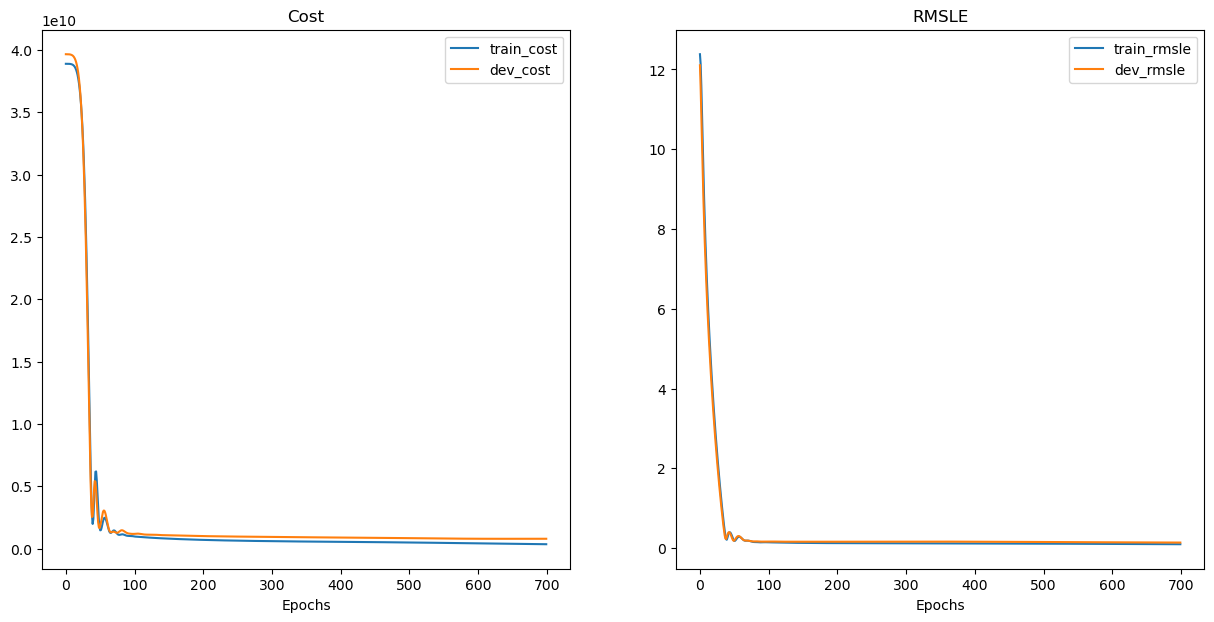

In [29]:
import matplotlib.pyplot as plt

def plot_learning_curves(results):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_cost": [...],
             "train_rmsle": [...],
             "dev_cost": [...],
             "dev_rmsle": [...]}
    """
    train_cost = results["train_cost"]
    dev_cost = results["dev_cost"]

    train_rmsle = results["train_rmsle"]
    dev_rmsle = results["dev_rmsle"]

    epochs = range(len(results["train_cost"]))

    plt.figure(figsize=(15, 7))

    # Plot cost
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_cost, label="train_cost")
    plt.plot(epochs, dev_cost, label="dev_cost")
    plt.title("Cost")
    plt.xlabel("Epochs")
    plt.legend()

    # Plot rmsle
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_rmsle, label="train_rmsle")
    plt.plot(epochs, dev_rmsle, label="dev_rmsle")
    plt.title("RMSLE")
    plt.xlabel("Epochs")
    plt.legend()

plot_learning_curves(results)

### 7. Evaluate model on train set and Validation set

In [30]:
# Make prediction on the trained model and measure RMSLE
model_2.eval()
with torch.inference_mode():
    y_train_pred = model_2(X_train_tensor).squeeze()
    y_dev_pred = model_2(X_dev_tensor).squeeze()

train_rmsle = torch.sqrt(msle_fn(preds=y_train_pred, target=y_train_tensor))

dev_rmsle = torch.sqrt(msle_fn(preds=y_dev_pred, target=y_dev_tensor))

print(f'Train RMSLE: {train_rmsle}')
print(f'Dev RMSLE: {dev_rmsle}')

Train RMSLE: 0.09704481810331345
Dev RMSLE: 0.13858360052108765


# 7. Make Predictions on Kaggle's Test Dataset 

In [31]:
# preprocessing test dataset
X_test_numpy = preprocessing_pipeline.transform(test_data.drop(columns=['Id']))

# Transform to tensor and put it in target device
X_test_tensor = torch.from_numpy(X_test_numpy).type(torch.float32).to(device)

display(X_test_tensor)
print(X_test_tensor.shape)
print(X_test_tensor.dtype)
print(X_test_tensor.device)

tensor([[-0.8668,  0.4329,  0.0867,  ...,  0.0000,  1.0000,  0.0000],
        [-0.8668,  0.4774,  0.3326,  ...,  0.0000,  1.0000,  0.0000],
        [ 0.0741,  0.1657,  0.2920,  ...,  0.0000,  1.0000,  0.0000],
        ...,
        [-0.8668,  3.9957,  0.8657,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.6622, -0.3688, -0.0231,  ...,  0.0000,  1.0000,  0.0000],
        [ 0.0741,  0.1657, -0.0988,  ...,  0.0000,  1.0000,  0.0000]],
       device='cuda:0')

torch.Size([1459, 264])
torch.float32
cuda:0


In [32]:
# Make predictions on test set
model_2.eval()
with torch.inference_mode():
    y_test_pred = model_2(X_test_tensor).squeeze()

print(y_test_pred)

pred_df = pd.DataFrame(
    {
        'Id': test_data['Id'],
        'SalePrice': y_test_pred.cpu().type(torch.float64).numpy()
    }
) 
pred_df

tensor([111129.0625, 142486.3750, 171444.2500,  ..., 161964.6875,
        110533.7031, 216703.6250], device='cuda:0')


,Id,SalePrice
0,1461,111129.062500
1,1462,142486.375000
2,1463,171444.250000
3,1464,189120.656250
4,1465,211765.437500
...,...,...
1454,2915,76305.125000
1455,2916,92634.867188
1456,2917,161964.687500
1457,2918,110533.703125


# 8. Saving and Loading the Model

In [33]:
from pathlib import Path

# create models directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# create model save path 
MODEL_NAME = 'housing_predict_model.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# save the model state dict
print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj=model_2.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models\housing_predict_model.pth


In [35]:
# Load the model
loaded_model_2 = RegressionModel(n_x=n_x, n_h=n_h)
loaded_model_2.load_state_dict(torch.load(MODEL_SAVE_PATH, weights_only=True))
loaded_model_2.to(device)

RegressionModel(
  (layer_stack): Sequential(
    (0): Linear(in_features=264, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=16, bias=True)
    (5): ReLU()
    (6): Linear(in_features=16, out_features=1, bias=True)
  )
)

In [36]:
# Make prediction on the loaded model and measure RMSLE
loaded_model_2.eval()
with torch.inference_mode():
    y_train_pred = loaded_model_2(X_train_tensor).squeeze()
    y_dev_pred = loaded_model_2(X_dev_tensor).squeeze()

train_rmsle = torch.sqrt(msle_fn(preds=y_train_pred, target=y_train_tensor))

dev_rmsle = torch.sqrt(msle_fn(preds=y_dev_pred, target=y_dev_tensor))

print(f'Train RMSLE: {train_rmsle}')
print(f'Dev RMSLE: {dev_rmsle}')

Train RMSLE: 0.09704481810331345
Dev RMSLE: 0.13858360052108765
